In [2]:
from sympy import *
from sympy.solvers.solveset import nonlinsolve
init_session()
x_A, y_A, x_B, y_B, Lambda, t_x, t_y, s, c = symbols('x_A y_A x_B y_B Lambda t_x t_y s c')

ImportError: cannot import name nonlinsolve

In [2]:
M = Matrix([[Lambda*c, -Lambda*s, t_x], [Lambda*s, Lambda*c, t_y],[0,0,1]])

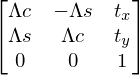

In [3]:
M

In [4]:
A=Matrix([[x_A],[y_A],[1]])

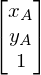

In [5]:
A

In [6]:
e1=M*A

In [7]:
B=Matrix([[x_B],[y_B],[1]])

In [8]:
e1[0]

In [9]:
e1[1]

In [10]:
e2=M*B

In [11]:
e2[0]

In [12]:
e2[1]

In [13]:
Eqns = [e1[0],e1[1],e2[0]-1,e2[1]-1]

In [14]:
Eqns

In [15]:
sols=linsolve(Eqns, c, s, t_x, t_y)

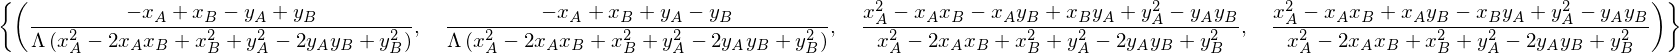

In [16]:
sols

In [17]:
for q in sols:
    print(q)

((-x_A + x_B - y_A + y_B)/(Lambda*(x_A**2 - 2*x_A*x_B + x_B**2 + y_A**2 - 2*y_A*y_B + y_B**2)), (-x_A + x_B + y_A - y_B)/(Lambda*(x_A**2 - 2*x_A*x_B + x_B**2 + y_A**2 - 2*y_A*y_B + y_B**2)), (x_A**2 - x_A*x_B - x_A*y_B + x_B*y_A + y_A**2 - y_A*y_B)/(x_A**2 - 2*x_A*x_B + x_B**2 + y_A**2 - 2*y_A*y_B + y_B**2), (x_A**2 - x_A*x_B + x_A*y_B - x_B*y_A + y_A**2 - y_A*y_B)/(x_A**2 - 2*x_A*x_B + x_B**2 + y_A**2 - 2*y_A*y_B + y_B**2))


In [18]:
cc=(-x_A + x_B - y_A + y_B)/(Lambda*(x_A**2 - 2*x_A*x_B + x_B**2 + y_A**2 - 2*y_A*y_B + y_B**2))

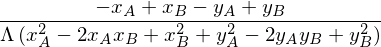

In [19]:
cc

In [20]:
ss=(-x_A + x_B + y_A - y_B)/(Lambda*(x_A**2 - 2*x_A*x_B + x_B**2 + y_A**2 - 2*y_A*y_B + y_B**2))

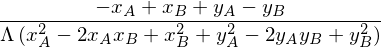

In [21]:
ss

In [22]:
Eqns2 = [e1[0],e1[1],e2[0]-1,e2[1]-1,s**2+c**2-1]

In [24]:
nonlinsolve(Eqns2,[c, s, t_x, t_y, Lambda])

NameError: name 'nonlinsolve' is not defined